MORINGA DATA SCIENCE PREP: WEEK 5

E-COMMERCE RETAIL COMPANY BASED IN THE UK 


source of the dataset; '/content/data.csv'

 from kaggle website

OBJECTIVE

Which products, country, month should the e-commerce retailer focus on and which products should it do away with in a  bid to improve its marketing, inventory management and yearly turnover? 

questions

i) Which is the peak month of the year? Which is the most popular day for purchases?  


ii) Which product is most popularly bought in the United Kingdom, France and Australia?Which are the top three countries? Which item has brought in most returns? Overall and in the individual countries? Is the most popular product the one that has the most revenue?


iii) Which products are more likely to have cancelling issues? The country with the highest cancelling issues,the popular product cancelled least and the highest.


   iv) Which items have brought in the least returns? Overall and in the individual countries?    Does the least popular product bring in the least returns? 
 

  v) Which country do we have the most customers from? Is it the country bringing the most revenue? What is the average expenditure of a consumer in the UK? Germany? France? 

 
vi) Which country  is seen to require more marketing to optimize its expenditure?


importing libraries

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pit

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


loading our csv files 

In [0]:
#loading our csv files and previewing the first 10 rows
url = '/content/data.csv'
df = pd.read_csv(url, encoding='latin1')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,12/1/2010 8:34,1.69,13047.0,United Kingdom


Previewing information about our dataset.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412977 entries, 0 to 412976
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    412977 non-null  object 
 1   StockCode    412977 non-null  object 
 2   Description  411634 non-null  object 
 3   Quantity     412976 non-null  float64
 4   InvoiceDate  412976 non-null  object 
 5   UnitPrice    412976 non-null  float64
 6   CustomerID   308494 non-null  float64
 7   Country      412976 non-null  object 
dtypes: float64(3), object(5)
memory usage: 25.2+ MB


In [0]:
df.shape

(412977, 8)

DATA CLEANING 

Completeness 

In [0]:
#checking for null values in the datasets
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1343
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     104483
Country             1
dtype: int64

In [0]:
#dropping the null values
df1=df.dropna()

In [0]:
df1.shape

(308494, 8)

In [0]:
# changing the InvoiceDate to to_datetime data type
df1['InvoiceDate']=pd.to_datetime(df1['InvoiceDate'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#splitting datetime to date and time
df1['date'] = [d.date() for d in df1.InvoiceDate]
df1['time'] = [d.time() for d in df1.InvoiceDate]
df1['date'] = pd.to_datetime(df1['date'])
df1['time'] = pd.to_datetime(df1['time'], format='%H:%M:%S:%f', errors = 'ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308494 entries, 0 to 412975
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    308494 non-null  object        
 1   StockCode    308494 non-null  object        
 2   Description  308494 non-null  object        
 3   Quantity     308494 non-null  float64       
 4   InvoiceDate  308494 non-null  datetime64[ns]
 5   UnitPrice    308494 non-null  float64       
 6   CustomerID   308494 non-null  float64       
 7   Country      308494 non-null  object        
 8   date         308494 non-null  datetime64[ns]
 9   time         308494 non-null  object        
dtypes: datetime64[ns](2), float64(3), object(5)
memory usage: 25.9+ MB


In [0]:
# splitting  time to hours, minutes and seconds.
df1[['h','m','s']] = df1['time'].astype(str).str.split(':', expand=True).astype(int)

print (df1)

       InvoiceNo StockCode                          Description  ...   h   m  s
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  ...   8  26  0
1         536365     71053                  WHITE METAL LANTERN  ...   8  26  0
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER  ...   8  26  0
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  ...   8  26  0
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  ...   8  26  0
...          ...       ...                                  ...  ...  ..  .. ..
412971    572302     21912             VINTAGE SNAKES & LADDERS  ...  14  47  0
412972    572302     22895  SET OF 2 TEA TOWELS APPLE AND PEARS  ...  14  47  0
412973    572302     22897              OVEN MITT APPLES DESIGN  ...  14  47  0
412974    572302     22840           ROUND CAKE TIN VINTAGE RED  ...  14  47  0
412975    572302    84997D      CHILDRENS CUTLERY POLKADOT PINK  ...  14  47  0

[308494 rows x 13 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
# splitting date to year,month and the day
df1[['yy','mm','dd']] = df1['date'].astype(str).str.split('-', expand=True).astype(int)

print (df1)



       InvoiceNo StockCode                          Description  ...    yy  mm  dd
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER  ...  2010  12   1
1         536365     71053                  WHITE METAL LANTERN  ...  2010  12   1
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER  ...  2010  12   1
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE  ...  2010  12   1
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.  ...  2010  12   1
...          ...       ...                                  ...  ...   ...  ..  ..
412971    572302     21912             VINTAGE SNAKES & LADDERS  ...  2011  10  23
412972    572302     22895  SET OF 2 TEA TOWELS APPLE AND PEARS  ...  2011  10  23
412973    572302     22897              OVEN MITT APPLES DESIGN  ...  2011  10  23
412974    572302     22840           ROUND CAKE TIN VINTAGE RED  ...  2011  10  23
412975    572302    84997D      CHILDRENS CUTLERY POLKADOT PINK  ...  2011  10  23

[30

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [0]:
#creating a dataframe without cancelled transactions.
df3=df1[~(df1.InvoiceNo.str.startswith('C'))]

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 301212 entries, 0 to 412975
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    301212 non-null  object        
 1   StockCode    301212 non-null  object        
 2   Description  301212 non-null  object        
 3   Quantity     301212 non-null  float64       
 4   InvoiceDate  301212 non-null  datetime64[ns]
 5   UnitPrice    301212 non-null  float64       
 6   CustomerID   301212 non-null  float64       
 7   Country      301212 non-null  object        
 8   date         301212 non-null  datetime64[ns]
 9   time         301212 non-null  object        
 10  h            301212 non-null  int64         
 11  m            301212 non-null  int64         
 12  s            301212 non-null  int64         
 13  yy           301212 non-null  int64         
 14  mm           301212 non-null  int64         
 15  dd           301212 non-null  int6

In [0]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,h,m,s,yy,mm,dd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,8,26,0,2010,12,1
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,26,0,2010,12,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,8,26,0,2010,12,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,26,0,2010,12,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,8,26,0,2010,12,1


In [0]:
#creating a new column for the total expenditure, quantity*unitprice
df3['Total Expenditure']=df3.Quantity * df3.UnitPrice


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


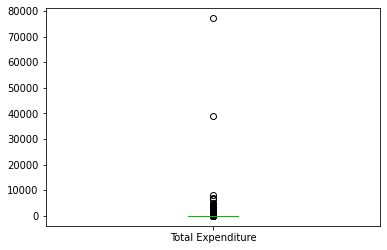

In [0]:
#checking for outliers from our total expenditure column using a boxplot
import matplotlib.pyplot as pit
% matplotlib inline
df3.boxplot(column = ["Total Expenditure"],grid = False)

Finding the cancelled transactions

In [0]:
#creating a dataframe that has only cancelled transactions
df4 = df1[df1.InvoiceNo.str.startswith('C')]

In [0]:
#previewing our dataframe
df4.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,date,time,h,m,s,yy,mm,dd
141,C536379,D,Discount,-1.0,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,2010-12-01,09:41:00,9,41,0,2010,12,1
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1.0,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,2010-12-01,09:49:00,9,49,0,2010,12,1
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12.0,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,2010-12-01,10:24:00,10,24,0,2010,12,1
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,10,24,0,2010,12,1
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24.0,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,2010-12-01,10:24:00,10,24,0,2010,12,1


In [0]:
#counting the cancelled transactions 
df4.count()

InvoiceNo      7282
StockCode      7282
Description    7282
Quantity       7282
InvoiceDate    7282
UnitPrice      7282
CustomerID     7282
Country        7282
date           7282
time           7282
h              7282
m              7282
s              7282
yy             7282
mm             7282
dd             7282
dtype: int64

**DATA ANALYSIS**

1) Which is the peak month of the year? ,, Which is the most popular day for purchases?  which is the most popular hour in the most popular day.

i) which is the peak month of the year

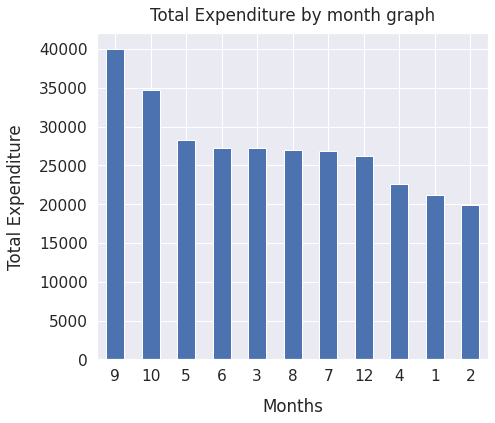

In [0]:
sns.set(font_scale=1.4)
df3['mm'].value_counts().plot(kind='bar',figsize=(7,6),rot=0)
pit.xlabel('Months',labelpad=14)
pit.ylabel('Total Expenditure', labelpad=14)
pit.title('Total Expenditure by month graph',y=1.02);

In [0]:
df3.groupby(['mm'])['Total Expenditure'].sum().sort_values(ascending = False)

mm
9     952838.382
10    762832.590
5     678594.560
6     661213.690
8     645343.900
7     600091.011
3     595500.760
12    572713.890
1     569445.040
4     469200.361
2     447137.350
Name: Total Expenditure, dtype: float64

ii) The most popular day in the most popular month.

In [0]:
#creating a  dataframe of the 11th month only.
df10=df3[df3.mm==11]

In [0]:
#finding the most popular day.
df10.groupby(['dd'])['Total Expenditure'].sum().sort_values(ascending=False)

Series([], Name: Total Expenditure, dtype: float64)

iii) the most popular hour in the most popular day of the most popular month.

In [0]:
# creating a dataframe where the day is on 23rd
df8= df10[df10.dd==23]

In [0]:
#finding the most popular hour.
df8.groupby(['h'])['Total Expenditure'].sum().sort_values(ascending=False)

Series([], Name: Total Expenditure, dtype: float64)

2) Which product is most popularly bought in the United Kingdom, France and Germany?Which are the top three countries? Which item has brought in most returns? Overall and in the individual countries? Is the most popular product

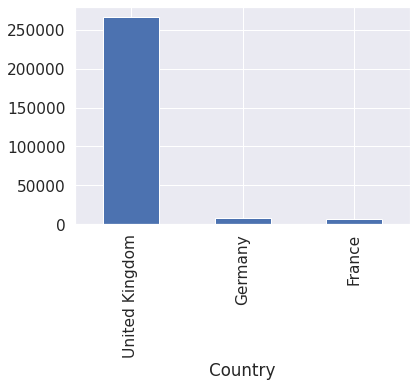

In [0]:
df3.groupby("Country")["StockCode"].count().sort_values(ascending=False).head(3).plot(kind='bar')

In [0]:
#Finding out the number of products sold
df3.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1686
REGENCY CAKESTAND 3 TIER              1464
JUMBO BAG RED RETROSPOT               1323
PARTY BUNTING                         1287
LUNCH BAG RED RETROSPOT               1121
                                      ... 
GARLAND, MAGIC GARDEN 1.8M               1
PINK POLKADOT KIDS BAG                   1
DOLLY CABINET 3 DRAWERS                  1
DROP DIAMANTE EARRINGS GREEN             1
GLASS BEAD HOOP NECKLACE BLACK           1
Name: StockCode, Length: 3790, dtype: int64

In [0]:
#Finding out the number of goods sold to each country 
df3.groupby('Country')['StockCode'].count().sort_values(ascending=False)

Country
United Kingdom          265986
Germany                   7473
France                    6365
EIRE                      5835
Netherlands               2024
Spain                     1954
Belgium                   1588
Switzerland               1492
Portugal                  1216
Australia                 1142
Norway                     715
Channel Islands            670
Finland                    553
Cyprus                     514
Italy                      494
Sweden                     358
Austria                    321
Denmark                    286
Japan                      273
Poland                     259
Israel                     248
Unspecified                244
Singapore                  222
Canada                     151
USA                        147
Iceland                    124
Greece                     109
Malta                      100
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [0]:
#Creating the new dataframe with countries as the United Kingdom
df5=df3[df3.Country=='United Kingdom']

In [0]:
#Counting the different products sold in the United Kingdom
df5.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1622
REGENCY CAKESTAND 3 TIER              1217
PARTY BUNTING                         1206
JUMBO BAG RED RETROSPOT               1191
ASSORTED COLOUR BIRD ORNAMENT         1049
                                      ... 
PINK FLUFFY CHRISTMAS DECORATION         1
DOORKNOB CRACKED GLAZE PINK              1
DOORKNOB CRACKED GLAZE GREEN             1
DOORKNOB CRACKED GLAZE BLUE              1
PURPLE GLASS TASSLE BAG CHARM            1
Name: StockCode, Length: 3753, dtype: int64

In [0]:
#Creating a new dataframe with the country as France
df6=df3[df3.Country=='France']

In [0]:
#Counting the different products sold in France
df6.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
POSTAGE                             230
PLASTERS IN TIN WOODLAND ANIMALS     55
PLASTERS IN TIN CIRCUS PARADE        52
RED TOADSTOOL LED NIGHT LIGHT        51
LUNCH BAG RED RETROSPOT              50
                                   ... 
RECIPE BOX RETROSPOT                  1
RECIPE BOX PANTRY YELLOW DESIGN       1
RAIN PONCHO RETROSPOT                 1
PURPLE PAPER PARASOL                  1
S/6 SEW ON CROCHET FLOWERS            1
Name: StockCode, Length: 1322, dtype: int64

In [0]:
#Creating a new dataframe with the country as Germany
df7=df3[df3.Country=='Germany']

In [0]:
#Counting the different products sold in Germany
df7.groupby('Description')['StockCode'].count().sort_values(ascending=False)

Description
POSTAGE                                293
ROUND SNACK BOXES SET OF4 WOODLAND      97
ROUND SNACK BOXES SET OF 4 FRUITS       64
REGENCY CAKESTAND 3 TIER                53
PLASTERS IN TIN WOODLAND ANIMALS        51
                                      ... 
PINK POLKADOT GARDEN PARASOL             1
EMBROIDERED RIBBON REEL RUBY             1
EMBROIDERED RIBBON REEL ROSIE            1
EMBROIDERED RIBBON REEL RACHEL           1
MILK PAN BLUE POLKADOT                   1
Name: StockCode, Length: 1565, dtype: int64

In [0]:
#Getting the product that had the highest returns
df3.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
PICNIC BASKET WICKER 60 PIECES      19809.75000
TEA TIME TEA TOWELS                  3022.50000
MISELTOE HEART WREATH CREAM           996.00000
SET/5 RED SPOTTY LID GLASS BOWLS      734.40000
HALL CABINET WITH 3 DRAWERS           625.88250
                                       ...     
ASSTD RASTA KEY-CHAINS                  0.42000
SILICON CUBE 25W, BLUE                  0.42000
HEN HOUSE WITH CHICK STANDING           0.42000
HEN HOUSE W CHICK IN NEST               0.42000
PADS TO MATCH ALL CUSHIONS              0.00075
Name: Total Expenditure, Length: 3790, dtype: float64

In [0]:
#Getting the product with the highest returns in the United Kingdom
df5=df3[df3.Country=='United Kingdom']
df5.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
PICNIC BASKET WICKER 60 PIECES    19809.750000
TEA TIME TEA TOWELS                3022.500000
HALL CABINET WITH 3 DRAWERS         625.882500
POTTING SHED CANDLE CITRONELLA      625.410000
MEDIUM CERAMIC TOP STORAGE JAR      597.224887
                                      ...     
ASSTD RASTA KEY-CHAINS                0.420000
SILICON CUBE 25W, BLUE                0.420000
HEN HOUSE WITH CHICK STANDING         0.420000
HEN HOUSE W CHICK IN NEST             0.420000
PADS TO MATCH ALL CUSHIONS            0.000750
Name: Total Expenditure, Length: 3753, dtype: float64

In [0]:
#Getting the product with the highest returns in France
df6=df3[df3.Country=='France']
df6.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
MINI WOODEN HAPPY BIRTHDAY GARLAND    835.20
Manual                                583.15
PINK HAPPY BIRTHDAY BUNTING           232.50
JUMBO BAG STRAWBERRY                  188.75
PINK PAINTED KASHMIRI CHAIR           171.80
                                       ...  
KEY FOB , SHED                          0.65
KEY FOB , BACK DOOR                     0.65
MIXED NUTS LIGHT GREEN BOWL             0.42
TRAVEL CARD WALLET RETRO PETALS         0.42
TRAVEL CARD WALLET VINTAGE ROSE         0.42
Name: Total Expenditure, Length: 1322, dtype: float64

In [0]:
#Getting the product with the most sales in Germany
df7=df3[df3.Country=='Germany']
df7.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=False)

Description
STOOL HOME SWEET HOME               318.2500
Manual                              310.4825
SET OF 16 VINTAGE BLACK CUTLERY     262.8000
COLOURING PENCILS BROWN TUBE        212.0000
BAKING MOULD ROSE MILK CHOCOLATE    198.0000
                                      ...   
FOLKART ZINC HEART CHRISTMAS DEC      0.8500
SANDALWOOD FAN                        0.8500
INFLATABLE POLITICAL GLOBE            0.8500
CHERUB HEART DECORATION GOLD          0.8300
ROUND CAKE TIN VINTAGE GREEN          0.0000
Name: Total Expenditure, Length: 1565, dtype: float64

3) Which items have brought in the least returns? Overall and in the individual countries?               Does the least popular product bring in the least returns?

i)Getting products with the least returns overall

In [0]:
#Getting the products with the least returns overall
df3.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
PADS TO MATCH ALL CUSHIONS              0.00075
HEN HOUSE W CHICK IN NEST               0.42000
HEN HOUSE WITH CHICK STANDING           0.42000
SILICON CUBE 25W, BLUE                  0.42000
ASSTD RASTA KEY-CHAINS                  0.42000
                                       ...     
HALL CABINET WITH 3 DRAWERS           625.88250
SET/5 RED SPOTTY LID GLASS BOWLS      734.40000
MISELTOE HEART WREATH CREAM           996.00000
TEA TIME TEA TOWELS                  3022.50000
PICNIC BASKET WICKER 60 PIECES      19809.75000
Name: Total Expenditure, Length: 3790, dtype: float64

In [0]:
#Getting the product with the least returns in the United Kingdom
df5.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
PADS TO MATCH ALL CUSHIONS            0.000750
HEN HOUSE W CHICK IN NEST             0.420000
HEN HOUSE WITH CHICK STANDING         0.420000
SILICON CUBE 25W, BLUE                0.420000
ASSTD RASTA KEY-CHAINS                0.420000
                                      ...     
MEDIUM CERAMIC TOP STORAGE JAR      597.224887
POTTING SHED CANDLE CITRONELLA      625.410000
HALL CABINET WITH 3 DRAWERS         625.882500
TEA TIME TEA TOWELS                3022.500000
PICNIC BASKET WICKER 60 PIECES    19809.750000
Name: Total Expenditure, Length: 3753, dtype: float64

In [0]:
#Getting the product with the least returns in France
df6.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
TRAVEL CARD WALLET VINTAGE ROSE         0.42
TRAVEL CARD WALLET RETRO PETALS         0.42
MIXED NUTS LIGHT GREEN BOWL             0.42
KEY FOB , BACK DOOR                     0.65
KEY FOB , SHED                          0.65
                                       ...  
PINK PAINTED KASHMIRI CHAIR           171.80
JUMBO BAG STRAWBERRY                  188.75
PINK HAPPY BIRTHDAY BUNTING           232.50
Manual                                583.15
MINI WOODEN HAPPY BIRTHDAY GARLAND    835.20
Name: Total Expenditure, Length: 1322, dtype: float64

In [0]:
#Getting the product with the least returns in Germany
df7.groupby('Description')['Total Expenditure'].mean().sort_values(ascending=True)

Description
ROUND CAKE TIN VINTAGE GREEN          0.0000
CHERUB HEART DECORATION GOLD          0.8300
INFLATABLE POLITICAL GLOBE            0.8500
SANDALWOOD FAN                        0.8500
FOLKART ZINC HEART CHRISTMAS DEC      0.8500
                                      ...   
BAKING MOULD ROSE MILK CHOCOLATE    198.0000
COLOURING PENCILS BROWN TUBE        212.0000
SET OF 16 VINTAGE BLACK CUTLERY     262.8000
Manual                              310.4825
STOOL HOME SWEET HOME               318.2500
Name: Total Expenditure, Length: 1565, dtype: float64

In [0]:
#Counting the least sold products overall
df3.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
GLASS BEAD HOOP NECKLACE BLACK           1
DROP DIAMANTE EARRINGS GREEN             1
DOLLY CABINET 3 DRAWERS                  1
PINK POLKADOT KIDS BAG                   1
GARLAND, MAGIC GARDEN 1.8M               1
                                      ... 
LUNCH BAG RED RETROSPOT               1121
PARTY BUNTING                         1287
JUMBO BAG RED RETROSPOT               1323
REGENCY CAKESTAND 3 TIER              1464
WHITE HANGING HEART T-LIGHT HOLDER    1686
Name: Total Expenditure, Length: 3790, dtype: int64

In [0]:
#Counting the least sold products in the United Kingdom
df5.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
PURPLE GLASS TASSLE BAG CHARM            1
DOORKNOB CRACKED GLAZE BLUE              1
DOORKNOB CRACKED GLAZE GREEN             1
DOORKNOB CRACKED GLAZE PINK              1
PINK FLUFFY CHRISTMAS DECORATION         1
                                      ... 
ASSORTED COLOUR BIRD ORNAMENT         1049
JUMBO BAG RED RETROSPOT               1191
PARTY BUNTING                         1206
REGENCY CAKESTAND 3 TIER              1217
WHITE HANGING HEART T-LIGHT HOLDER    1622
Name: Total Expenditure, Length: 3753, dtype: int64

In [0]:
#Counting the least sold products in the France
df6.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
S/6 SEW ON CROCHET FLOWERS            1
PURPLE PAPER PARASOL                  1
RAIN PONCHO RETROSPOT                 1
RECIPE BOX PANTRY YELLOW DESIGN       1
RECIPE BOX RETROSPOT                  1
                                   ... 
LUNCH BAG RED RETROSPOT              50
RED TOADSTOOL LED NIGHT LIGHT        51
PLASTERS IN TIN CIRCUS PARADE        52
PLASTERS IN TIN WOODLAND ANIMALS     55
POSTAGE                             230
Name: Total Expenditure, Length: 1322, dtype: int64

In [0]:
#Counting the least sold products in Germany
df7.groupby('Description')['Total Expenditure'].count().sort_values(ascending=True)

Description
MILK PAN BLUE POLKADOT                   1
EMBROIDERED RIBBON REEL RACHEL           1
EMBROIDERED RIBBON REEL ROSIE            1
EMBROIDERED RIBBON REEL RUBY             1
PINK POLKADOT GARDEN PARASOL             1
                                      ... 
PLASTERS IN TIN WOODLAND ANIMALS        51
REGENCY CAKESTAND 3 TIER                53
ROUND SNACK BOXES SET OF 4 FRUITS       64
ROUND SNACK BOXES SET OF4 WOODLAND      97
POSTAGE                                293
Name: Total Expenditure, Length: 1565, dtype: int64

4) Which products are more likely to have cancelling issues? The country with the highest cancelling issues,the popular product cancelled least and the highest

In [0]:
#creating a new column cost that is the unitprice*quantity
df4['cost']=df4.Quantity * df4.UnitPrice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
# i) Country with the highest cancelling issue
df4.groupby(['Country'])['cost'].sum().sort_values(ascending=True )

Country
United Kingdom       -330777.92
EIRE                  -14807.65
Singapore             -12158.90
Spain                  -6612.66
Germany                -4785.41
Portugal               -4373.84
France                 -2699.80
Japan                  -1958.82
USA                    -1579.51
Sweden                 -1434.90
Australia              -1007.31
Norway                 -1001.98
Netherlands             -766.80
Switzerland             -702.55
Cyprus                  -552.84
Channel Islands         -340.30
Italy                   -234.85
Israel                  -227.44
Denmark                 -187.20
Belgium                 -156.73
Poland                  -102.15
Finland                  -97.26
Czech Republic           -57.51
Greece                   -50.00
Austria                  -44.36
Malta                    -28.50
Saudi Arabia             -14.75
European Community        -8.50
Name: cost, dtype: float64

In [0]:
# ii) The most cancelled product
df4.groupby(['Description'])['Quantity'].sum().sort_values(ascending=True)

Description
MEDIUM CERAMIC TOP STORAGE JAR        -74493.0
ROTATING SILVER ANGELS T-LIGHT HLDR    -9366.0
Manual                                 -3733.0
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114.0
PINK BLUE FELT CRAFT TRINKET BOX       -2617.0
                                        ...   
MINI  ZINC GARDEN DECORATIONS             -1.0
MILK PAN PINK POLKADOT                    -1.0
MEDINA STAMPED METAL STOOL                -1.0
FUNKY WASHING UP GLOVES ASSORTED          -1.0
LOVE HEART SOCK HANGER                    -1.0
Name: Quantity, Length: 1764, dtype: float64

In [0]:
# iii) The least cancelled product
df4.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)

Description
LOVE HEART SOCK HANGER                    -1.0
FUNKY WASHING UP GLOVES ASSORTED          -1.0
MEDINA STAMPED METAL STOOL                -1.0
MILK PAN PINK POLKADOT                    -1.0
MINI  ZINC GARDEN DECORATIONS             -1.0
                                        ...   
PINK BLUE FELT CRAFT TRINKET BOX       -2617.0
FAIRY CAKE FLANNEL ASSORTED COLOUR     -3114.0
Manual                                 -3733.0
ROTATING SILVER ANGELS T-LIGHT HLDR    -9366.0
MEDIUM CERAMIC TOP STORAGE JAR        -74493.0
Name: Quantity, Length: 1764, dtype: float64

5) Which country do we have the most customers from? Is it the country bringing the most revenue? ,What is the average expenditure of a consumer in the the given countries.

In [0]:
#changing country to string datatype to allow for grouping
df3["Country"] = df3["Country"].astype("str")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#the country with the most customers
df3.groupby (['Country'])['CustomerID'].count().sort_values(ascending= False)

Country
United Kingdom          265986
Germany                   7473
France                    6365
EIRE                      5835
Netherlands               2024
Spain                     1954
Belgium                   1588
Switzerland               1492
Portugal                  1216
Australia                 1142
Norway                     715
Channel Islands            670
Finland                    553
Cyprus                     514
Italy                      494
Sweden                     358
Austria                    321
Denmark                    286
Japan                      273
Poland                     259
Israel                     248
Unspecified                244
Singapore                  222
Canada                     151
USA                        147
Iceland                    124
Greece                     109
Malta                      100
United Arab Emirates        68
European Community          60
RSA                         58
Lebanon                     45


In [0]:
#country bringing in the most revenue?
df3['Total Expenditure'].groupby(df3['Country']).sum().sort_values(ascending=False)

Country
United Kingdom          5.630684e+06
Netherlands             2.378491e+05
EIRE                    2.273490e+05
Germany                 1.892810e+05
France                  1.512936e+05
Australia               1.312786e+05
Spain                   4.955474e+04
Switzerland             4.541369e+04
Sweden                  3.496390e+04
Belgium                 3.141483e+04
Portugal                2.798680e+04
Japan                   2.700825e+04
Norway                  2.405452e+04
Singapore               2.127929e+04
Channel Islands         1.873727e+04
Finland                 1.732639e+04
Denmark                 1.608687e+04
Cyprus                  1.312949e+04
Italy                   1.073340e+04
Austria                 8.185700e+03
Israel                  7.221690e+03
Poland                  5.973420e+03
Greece                  4.079530e+03
Canada                  3.666380e+03
Iceland                 2.790860e+03
USA                     2.695150e+03
Unspecified             2.6670

In [0]:
#mean expenditure of each consumer per country
df3['Total Expenditure'].groupby([df3['Country'],df3['CustomerID']]).mean()

Country         CustomerID
Australia       12386.0        40.190000
                12388.0        27.111522
                12393.0        24.728125
                12415.0       173.586603
                12422.0        18.390476
                                 ...    
United Kingdom  18287.0        26.367164
Unspecified     12363.0        24.000000
                12743.0         4.077836
                14265.0        17.102581
                16320.0        18.543929
Name: Total Expenditure, Length: 3888, dtype: float64

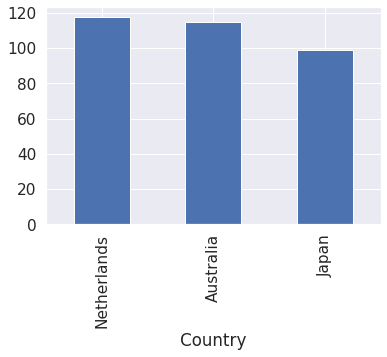

In [0]:
df3.groupby("Country")["Total Expenditure"].mean().sort_values(ascending=False).head(3).plot(kind='bar')

In [0]:
#mean expenditure per country
df3['Total Expenditure'].groupby(df3['Country']).mean().sort_values(ascending = False)

Country
Netherlands             117.514373
Australia               114.954982
Japan                    98.931319
Sweden                   97.664525
Singapore                95.852658
Denmark                  56.247797
Lithuania                47.458857
EIRE                     38.962979
Lebanon                  37.641778
Greece                   37.426881
Brazil                   35.737500
Norway                   33.642685
Czech Republic           33.069600
Bahrain                  32.258824
Finland                  31.331627
Switzerland              30.438130
Israel                   29.119718
United Arab Emirates     27.974706
Channel Islands          27.966075
Cyprus                   25.543755
Austria                  25.500623
Spain                    25.360665
Germany                  25.328656
Canada                   24.280662
France                   23.769617
Poland                   23.063398
Portugal                 23.015461
Iceland                  22.506935
Italy       